#in the terminal pip install seaborn and scikit-learn as we might use it
#seaborn is used for data visualization, while scikit-learn is used for machine learning tasks in Python

 # Exploring Housing Prices in London


In [7]:
#Import all dependencies we might need
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import requests
import time
from scipy.stats import linregress
import hvplot.pandas
import seaborn as sns

In [8]:
# Load the data into a pandas dataframe
london_df = pd.read_csv("Resources/london.csv")
london_df.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [6]:
london_df.info()
#Here we are checking if we have null values and if we have missing values
#You can see we have missing values as location = 2518 and the rest = 3480

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


In [11]:
#Getting rid of missing values (NaN) using drop, inplace=true saves the 'dropped' data
london_df.dropna(inplace=True)

In [12]:
london_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2518 non-null   int64 
 1   Property Name      2518 non-null   object
 2   Price              2518 non-null   int64 
 3   House Type         2518 non-null   object
 4   Area in sq ft      2518 non-null   int64 
 5   No. of Bedrooms    2518 non-null   int64 
 6   No. of Bathrooms   2518 non-null   int64 
 7   No. of Receptions  2518 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        2518 non-null   object
 10  Postal Code        2518 non-null   object
dtypes: int64(6), object(5)
memory usage: 236.1+ KB


In [16]:
# Dropping any duplicate rows
london_df.drop_duplicates(inplace=True)
london_df

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
3473,3473,Park Lane,19950000,Flat / Apartment,3698,5,5,5,Mayfair,London,W1K 7AJ
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


In [18]:
# Checking data type
london_df.dtypes

Unnamed: 0            int64
Property Name        object
Price                 int64
House Type           object
Area in sq ft         int64
No. of Bedrooms       int64
No. of Bathrooms      int64
No. of Receptions     int64
Location             object
City/County          object
Postal Code          object
dtype: object

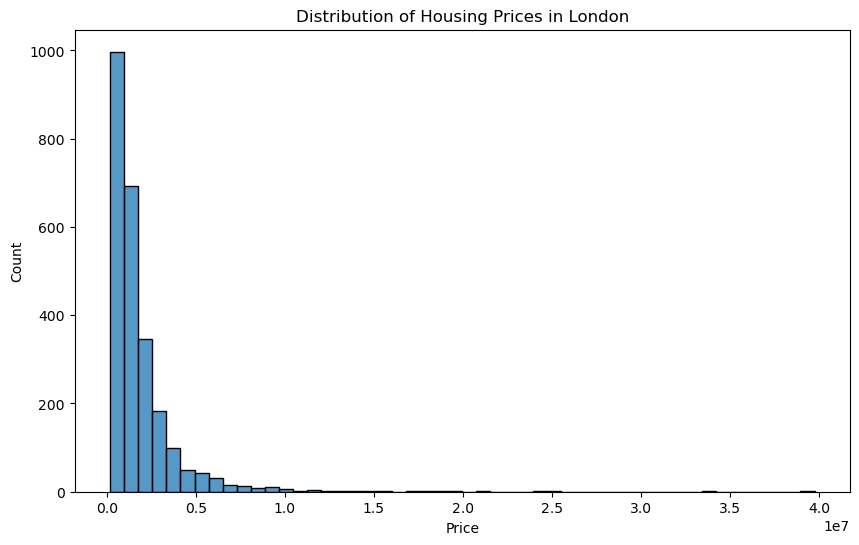

In [21]:
#Distribution of housing prices
plt.figure(figsize=(10, 6))
sns.histplot(data=london_df, x='Price', bins=50)
plt.title('Distribution of Housing Prices in London')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [25]:
#Locations with highest and lowest median housing prices
median_prices = london_df.groupby('Location')['Price'].median().sort_values(ascending=False)
print(f"Highest median prices:\n{median_prices.head()}\n")
print(f"Lowest median prices:\n{median_prices.tail()}\n")

Highest median prices:
Location
Hampstead Heath       23950000.0
30 Montpelier Walk    21000000.0
25 Cork Street        13750000.0
St Johns Wood         12849975.0
Regents Park          12500000.0
Name: Price, dtype: float64

Lowest median prices:
Location
 Lewisham         300000.0
Livermere Road    300000.0
Newham            300000.0
Hackney Wick      299950.0
Streatham Hill    249999.0
Name: Price, dtype: float64



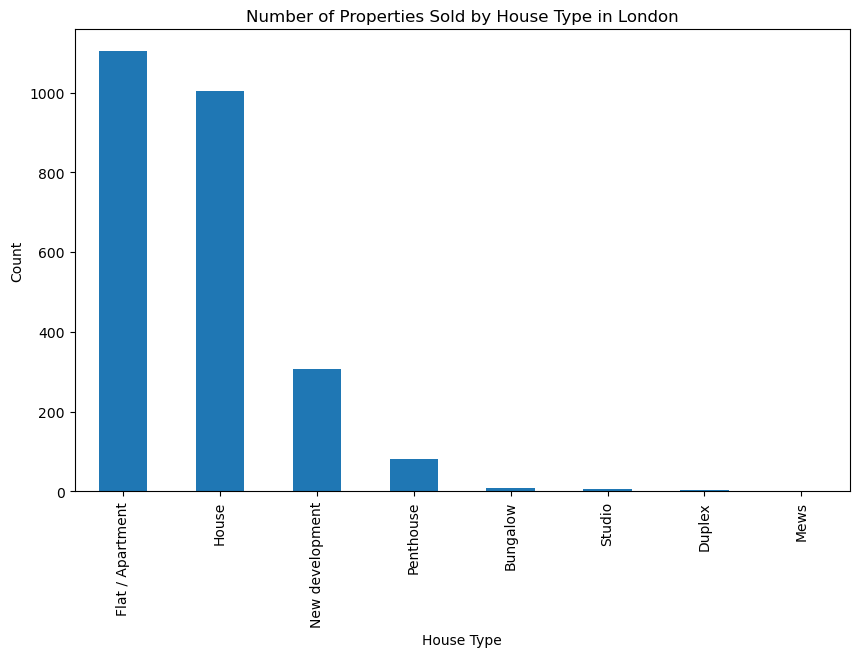

In [27]:
#Most commonly sold property types
plt.figure(figsize=(10, 6))
london_df['House Type'].value_counts().plot(kind='bar')
plt.title('Number of Properties Sold by House Type in London')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.show()


In [29]:
#Correlation between number of bedrooms and price
corr_coef = np.corrcoef(london_df['Price'], london_df['No. of Bedrooms'])[0][1]
print(f"Correlation between number of bedrooms and price: {corr_coef:.2f}")


Correlation between number of bedrooms and price: 0.44
